# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])
print(random_image.shape, np.amax(random_image), np.amin(random_image))
print(random_image.max(), random_image.min())

plt.imshow(random_image, cmap='gray')
plt.axis("off")
plt.colorbar();

The same holds for "real-world" images:

In [ ]:
from skimage import data

coins = data.coins()

print(type(coins), coins.dtype, coins.shape, coins.min(), coins.max())

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

In [ ]:
cat = data.chelsea()
print(type(cat), cat.shape, cat.min(), cat.max())

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

In [ ]:
cat[10:220, 10:220, :] = [0, 255, 255]  # [red, green, blue]
plt.imshow(cat);

In [ ]:
from skimage import io
io.imsave('./outs/cat.png', cat)

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

In [ ]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [ ]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()
print(type(image), image.dtype, image.shape, image.min(), image.max())
image_float = img_as_float(image)

print(type(image_float), image_float.dtype, image_float.min(), image_float.max())
print(231/255)

In [ ]:
image_ubyte = img_as_ubyte(image_float)
print(type(image_ubyte), image_ubyte.dtype, image_ubyte.shape, image_ubyte.min(), image_ubyte.max())


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

In [ ]:
from skimage import io


image = io.imread('./images/lena_color_256.tif', as_gray=True)

print(type(image), image.dtype, image.shape, image.min(), image.max())

plt.imshow(image, cmap='gray')
plt.axis("off")

We also have the ability to load multiple images, or multi-layer TIFF images:

In [ ]:
ic = io.ImageCollection('./images/test/*.png')

print('Type:', type(ic))

ic.files

In [ ]:
import os

f, axes = plt.subplots(nrows=2, ncols=len(ic) // 3 + 1, figsize=(20, 5))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

### Aside: `enumerate`

`enumerate` gives us each element in a container, along with its position.

In [ ]:
animals = ['cat', 'dog', 'leopard']

In [ ]:
for i, animal in enumerate(animals):
    print('The animal in position {} is {}'.format(i, animal))

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

In [ ]:
import skimage
print(skimage.__version__)
from skimage import draw

In [ ]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.disk(center=(100, 100), radius=100)
red[r, c] = 1

r, c = draw.disk(center=(100, 200), radius=100)
green[r, c] = 1

r, c = draw.disk(center=(200, 150), radius=100)
blue[r, c] = 1

print(red.min(), red.max())

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

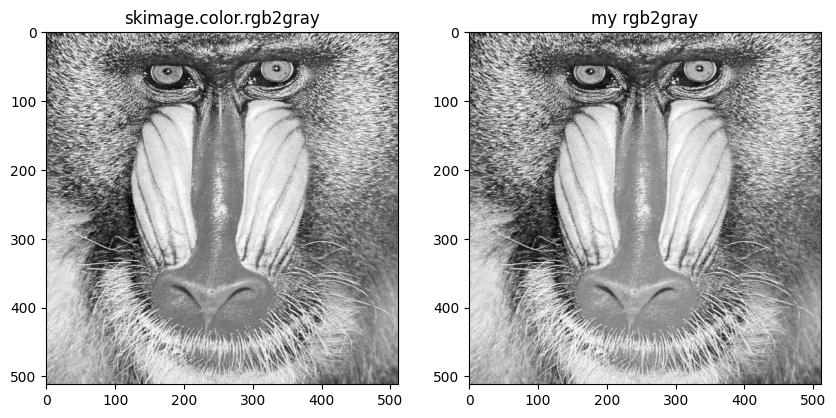

In [28]:
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float

# โหลดภาพและแปลงเป็น float
image = img_as_float(io.imread('./images/mandril_color.tif'))

# ตรวจสอบว่าภาพมี 3 แชนแนลหรือไม่
if image.ndim == 3 and image.shape[-1] == 3:
    gray = color.rgb2gray(image, channel_axis=-1)
    my_gray = 0.2989 * image[:, :, 0] + 0.5870 * image[:, :, 1] + 0.1140 * image[:, :, 2]
else:
    gray = my_gray = image  
# สร้าง subplot และแสดงผล
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')

plt.show()


In [31]:
print(gray.min(), gray.max())

gray = img_as_ubyte(gray)
my_gray = img_as_ubyte(my_gray)
print(gray.min(), gray.max())
print(type(gray), gray.dtype)

1 202
1 202
<class 'numpy.ndarray'> uint8


In [32]:
io.imsave('./outs/mandril.png', gray)